<a href="https://colab.research.google.com/github/PurraSujay/DataScience-Project/blob/main/covid_19_Data_Analysys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID 19 Data Analysis !**



**Let's Perform EDA on Indian Covid Dataset**

"Import Required Libraries !"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

**''' reading dataset '''**

In [3]:

df = pd.read_csv('Latest Covid-19 India Status.csv')

In [4]:
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Maharashtra,6122893,117869,5881167,123857,1.93,96.05,2.02
1,Kerala,3011694,108400,2889186,14108,3.60,95.93,0.47
2,Karnataka,2862338,39626,2787111,35601,1.38,97.37,1.24
3,Tamil Nadu,2506848,34076,2439576,33196,1.36,97.32,1.32
4,Andhra Pradesh,1911231,32356,1865956,12919,1.69,97.63,0.68


In [5]:
df.tail()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
31,Sikkim,21573,1975,19287,311,9.15,89.40,1.44
32,Ladakh,20143,183,19756,204,0.91,98.08,1.01
33,Dadra and Nagar Haveli and Daman and Diu,10576,38,10534,4,0.36,99.60,0.04
34,Lakshadweep,9965,246,9670,49,2.47,97.04,0.49
35,Andaman and Nicobar,7491,14,7349,128,0.19,98.10,1.71


In [7]:
df.shape

(36, 8)

In [9]:
df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [13]:
# Renaming column names 
df.columns = ['State', 'Total_Cases', 'Active', 'Discharged', 'Deaths', 'Active_Ratio', 'Discharge_Ratio', 'Death_Ratio']

In [14]:
df.head()

,State,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
0,Maharashtra,6122893,117869,5881167,123857,1.93,96.05,2.02
1,Kerala,3011694,108400,2889186,14108,3.60,95.93,0.47
2,Karnataka,2862338,39626,2787111,35601,1.38,97.37,1.24
3,Tamil Nadu,2506848,34076,2439576,33196,1.36,97.32,1.32
4,Andhra Pradesh,1911231,32356,1865956,12919,1.69,97.63,0.68


**''' correlation '''**

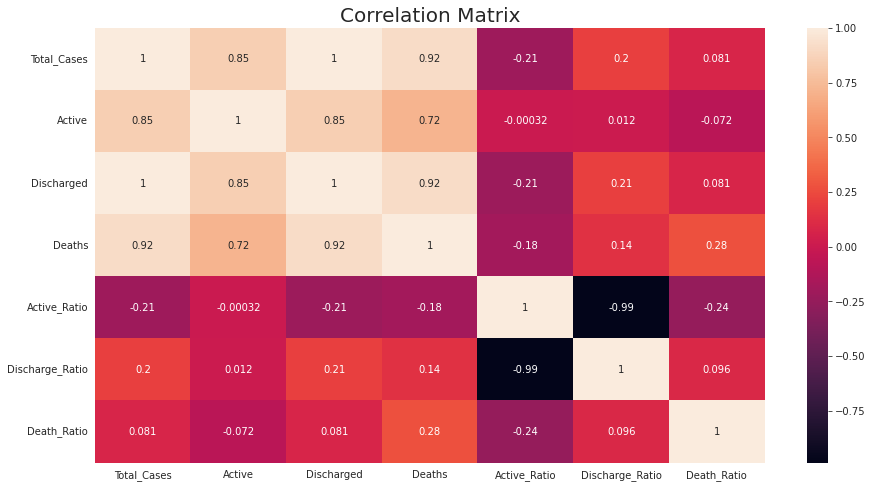

In [18]:
''' correlation '''
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

**''' Line Plot for active cases '''**

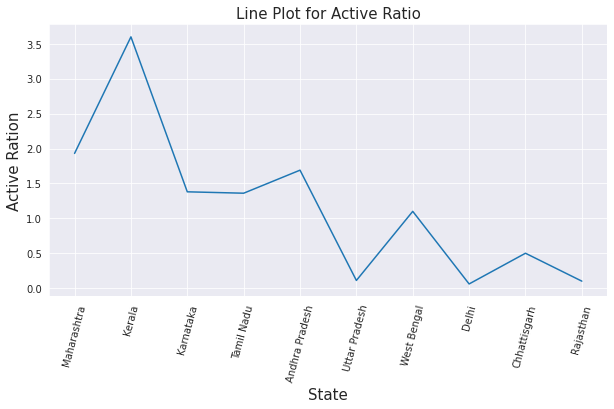

In [20]:
''' Line Plot '''
plt.figure(figsize=(10,5))
sns.lineplot(y='Active_Ratio', data=df.head(10), x='State')
plt.xticks(rotation=75)
plt.xlabel('State', fontsize=15)
plt.ylabel('Active Ration', fontsize=15)
plt.title("Line Plot for Active Ratio",fontsize=15);

**checking above line plot values in DataFrame **

In [22]:
df.head()

,State,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio
0,Maharashtra,6122893,117869,5881167,123857,1.93,96.05,2.02
1,Kerala,3011694,108400,2889186,14108,3.60,95.93,0.47
2,Karnataka,2862338,39626,2787111,35601,1.38,97.37,1.24
3,Tamil Nadu,2506848,34076,2439576,33196,1.36,97.32,1.32
4,Andhra Pradesh,1911231,32356,1865956,12919,1.69,97.63,0.68


**''' Toatal Cases in each state'''**

In [23]:
total_cases_state = df.groupby('State')['Total_Cases'].sum().sort_values(ascending=False)


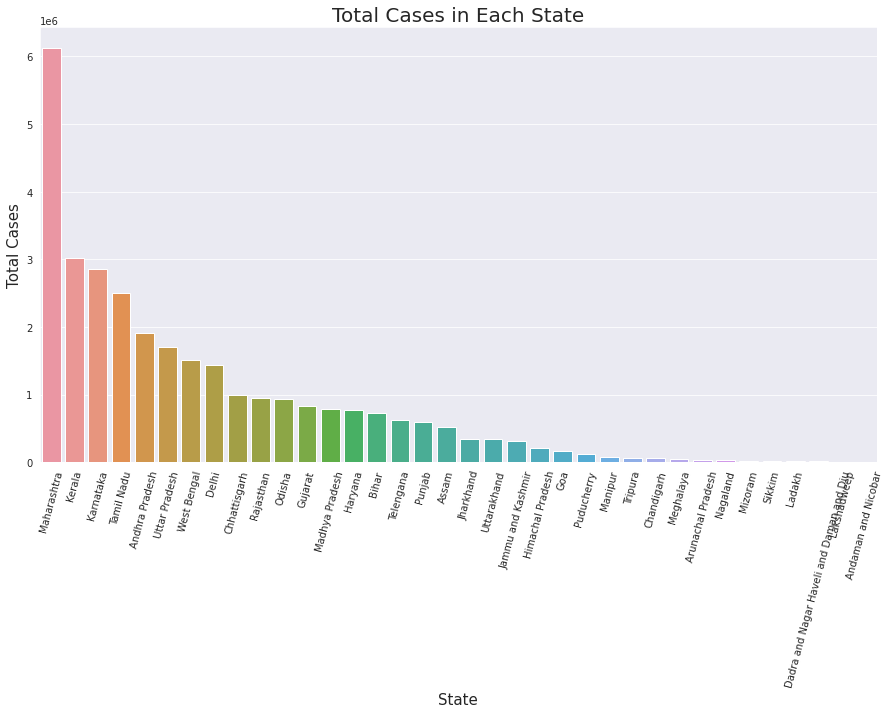

In [26]:
#Barplot
plt.figure(figsize=(15, 8));
plt.xticks(rotation=75)
sns.barplot(total_cases_state.index, total_cases_state);
plt.title('Total Cases in Each State', fontsize=20);
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Cases', fontsize=15);

**top 10 states total cases**

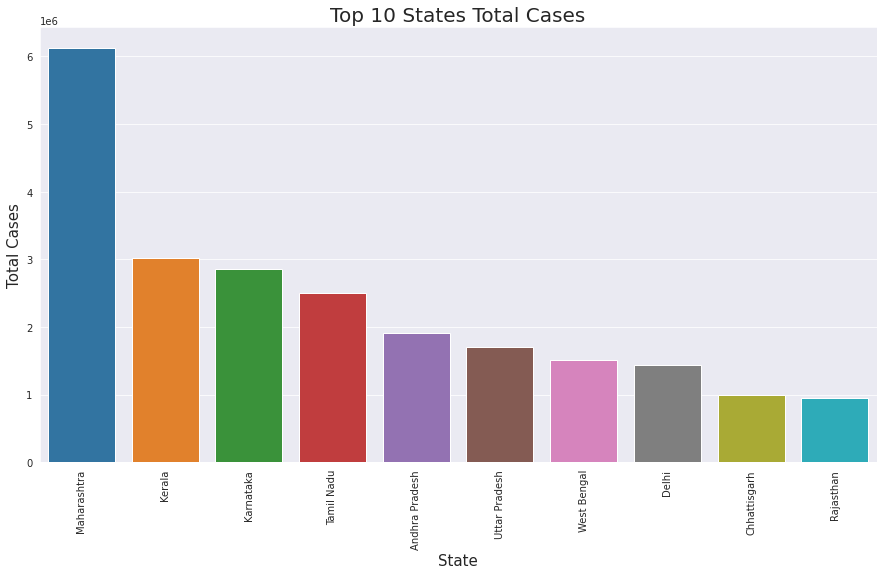

In [27]:

top_10 = total_cases_state[:10]
plt.figure(figsize=(15, 8));
plt.xticks(rotation=90)
sns.barplot(top_10.index, top_10);
plt.title('Top 10 States Total Cases', fontsize=20);
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Cases', fontsize=15);

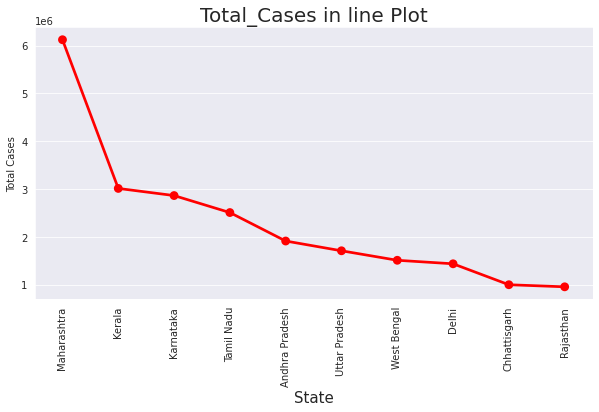

In [28]:
''' point plot of total cases '''
plt.figure(figsize=(10,5))
sns.pointplot(x='State',y='Total_Cases',data=df.head(10), color='red')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Cases')
plt.title("Total_Cases in line Plot",fontsize=20);

***''' plotting distribution plot of death, active, discharged '''***

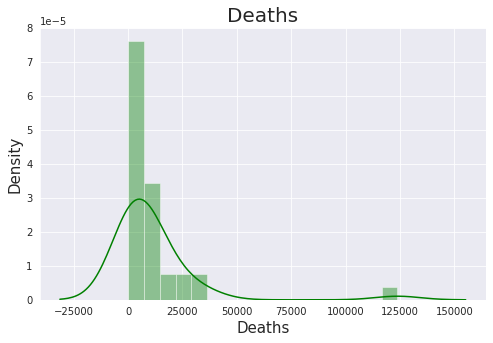

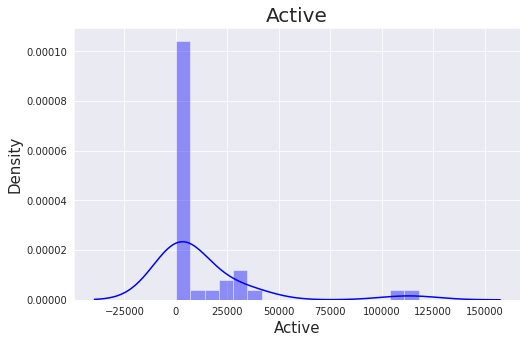

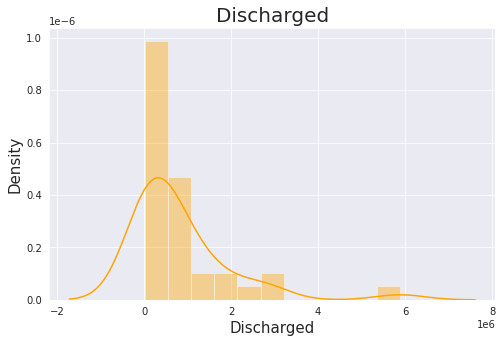

In [31]:

for column in ['Deaths', 'Active', 'Discharged']:
    plt.figure(figsize=(8, 5))
    if column == 'Deaths':
        sns.distplot(df[column], color='Green')
        plt.title(column, fontsize=20);
        plt.xlabel('Deaths', fontsize=15)
        plt.ylabel('Density', fontsize=15);\
        
    elif column  == 'Active':
        sns.distplot(df[column], color='Blue')
        plt.title(column, fontsize=20);
        plt.xlabel('Active', fontsize=15)
        plt.ylabel('Density', fontsize=15);
        
    else:
        sns.distplot(df[column], color='orange')
        plt.title(column, fontsize=20);
        plt.xlabel('Discharged', fontsize=15)
        plt.ylabel('Density', fontsize=15);

**''' pie chart of active cases in top 5 states in india'''**

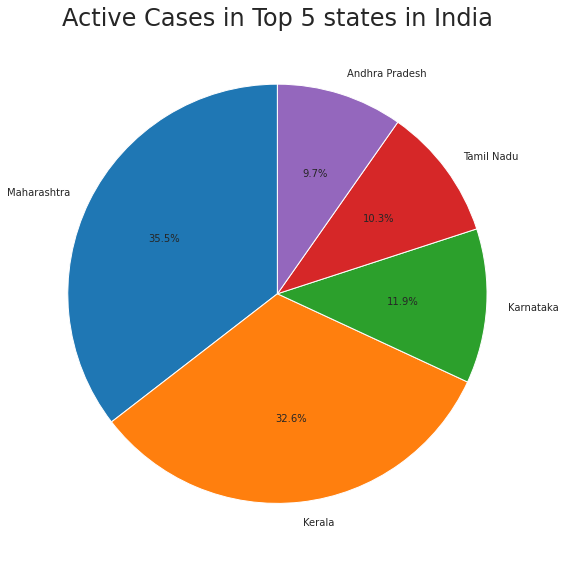

In [32]:

plt.figure(figsize=(8,8))
labels = df.index
plt.pie(x='Active', data=df.head(), labels='State',startangle=90,autopct='%.1f%%')
plt.title("Active Cases in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

**''' pie chart of total cases in top 5 states in India '''**

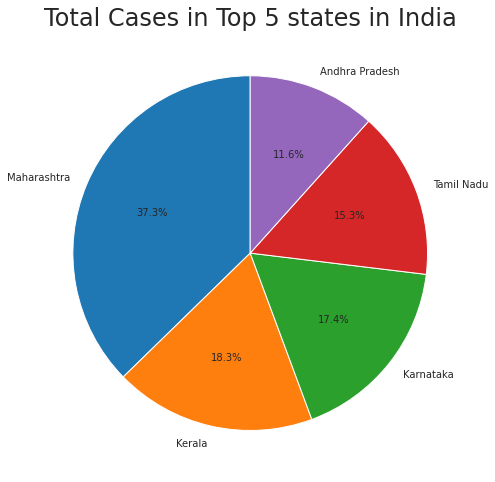

In [33]:

plt.figure(figsize=(7,7))
labels = df.index
plt.pie(x='Total_Cases', data=df.head(), labels='State', startangle=90,autopct='%.1f%%')
plt.title("Total Cases in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

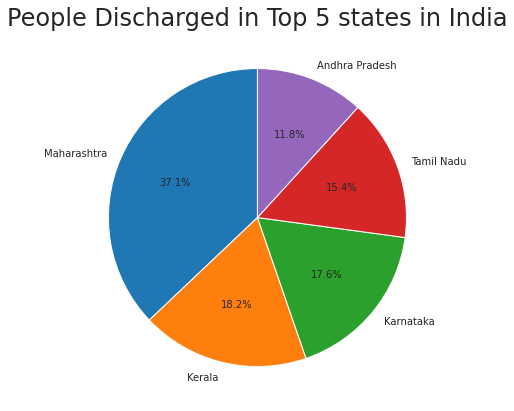

In [64]:
plt.figure(figsize=(7,7))
labels = df.index
plt.pie(x='Discharged',data=df[:5],labels='State',startangle=90,autopct='%.1f%%')
plt.title("People Discharged in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

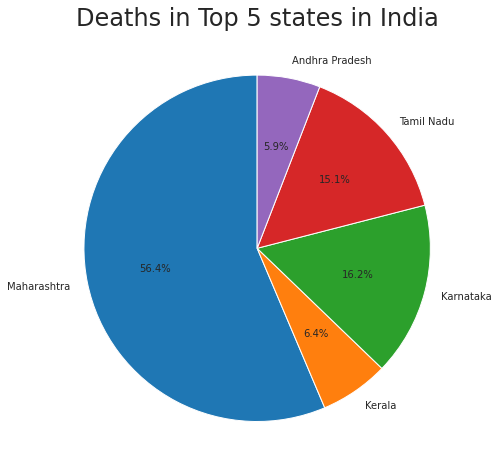

In [66]:
plt.figure(figsize=(7,7))
labels = df.index
plt.pie(x='Deaths',data=df[:5],labels='State',startangle=90,autopct='%.1f%%')
plt.title("Deaths in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

**Top 10 Active Ratio to Deaths Ratio in India**

In [68]:
df.head()

,State,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio,Recovered_Cases
0,Maharashtra,6122893,117869,5881167,123857,1.93,96.05,2.02,5881167
1,Kerala,3011694,108400,2889186,14108,3.60,95.93,0.47,2889186
2,Karnataka,2862338,39626,2787111,35601,1.38,97.37,1.24,2787111
3,Tamil Nadu,2506848,34076,2439576,33196,1.36,97.32,1.32,2439576
4,Andhra Pradesh,1911231,32356,1865956,12919,1.69,97.63,0.68,1865956


Text(0.5, 1.0, 'Top 10 Active Ratio to Deaths Ratio in India')

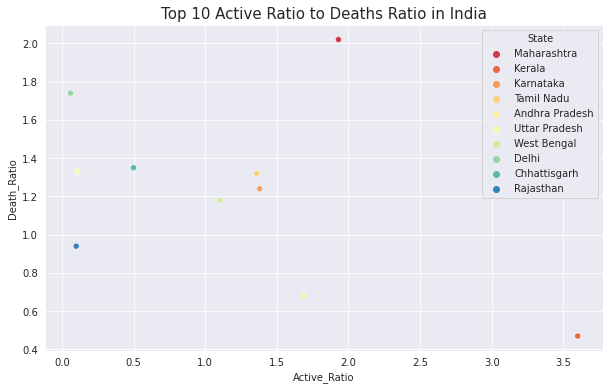

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Active_Ratio',y='Death_Ratio',data=df[:10],palette='Spectral',legend='brief',hue='State')
plt.title("Top 10 Active Ratio to Deaths Ratio in India",fontsize=15)

**The highest Active Ratio to Death Ratio in the country. checking highest and lowest ratio** 

Text(0.5, 1.0, 'Top 10 Active Ratio to Deaths Ratio in India')

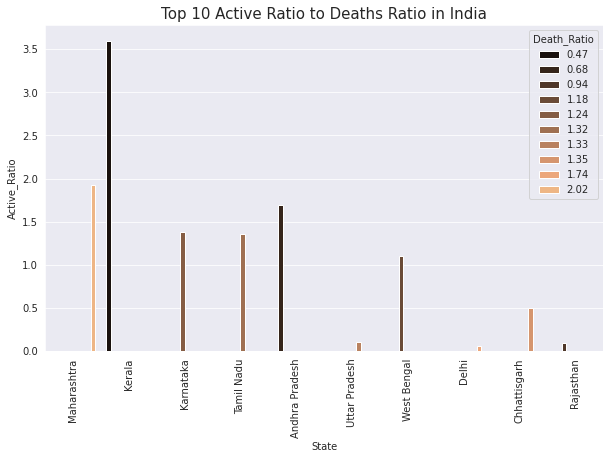

In [77]:
sort_data= df.sort_values(by='Active_Ratio',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='State',y='Active_Ratio',data=df[:10],palette='copper',hue='Death_Ratio')
plt.xticks(rotation=90)
plt.title("Top 10 Active Ratio to Deaths Ratio in India",fontsize=15)

Text(0.5, 1.0, 'Line Plot for Active Ratio')

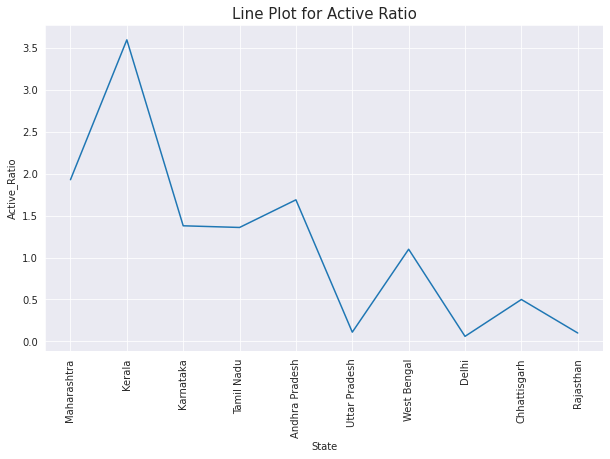

In [78]:
plt.figure(figsize=(10,6))
sns.lineplot(y='Active_Ratio',data=df[:10],x='State')
plt.xticks(rotation=90)
plt.title("Line Plot for Active Ratio",fontsize=15)

Text(0.5, 1.0, 'Top 10 Death Ratio in India')

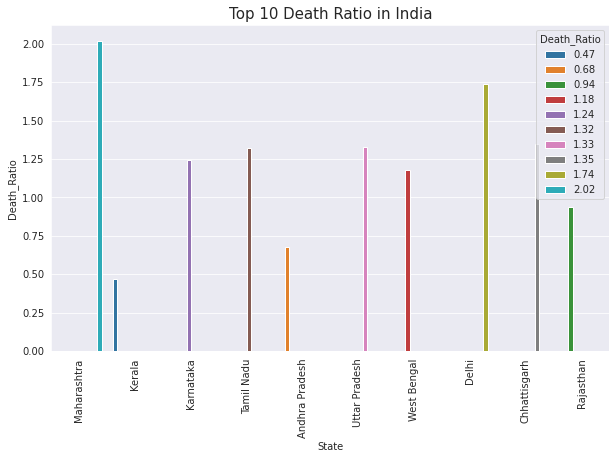

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x='State',y='Death_Ratio',data=df[:10],hue='Death_Ratio')
plt.xticks(rotation=90)
plt.title("Top 10 Death Ratio in India",fontsize=15)

Text(0.5, 1.0, ' Lineplot for Death Ratio')

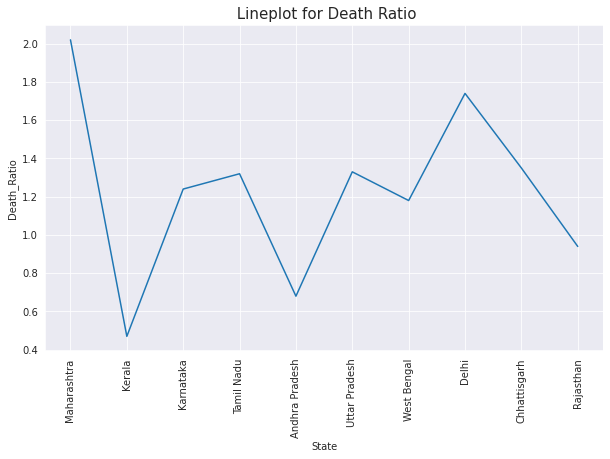

In [84]:
plt.figure(figsize=(10,6))
sns.lineplot(y='Death_Ratio',data=df[:10],x='State')
plt.xticks(rotation=90)
plt.title(" Lineplot for Death Ratio",fontsize=15)

Text(0.5, 1.0, 'Discharge Ratio for top 10 states')

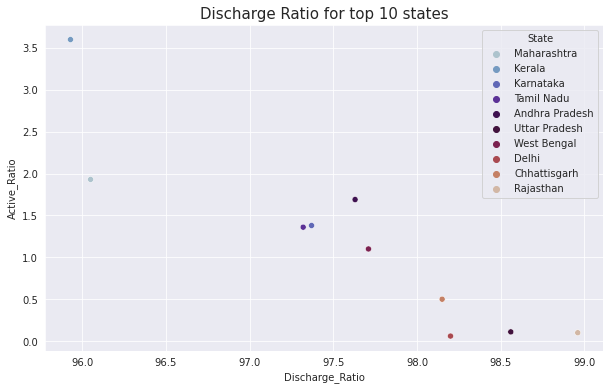

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discharge_Ratio',y='Active_Ratio',data=df[:10],palette='twilight',hue='State')
plt.title("Discharge Ratio for top 10 states",fontsize=15)

Text(0.5, 1.0, 'Top 10 Discharge Ratio in India')

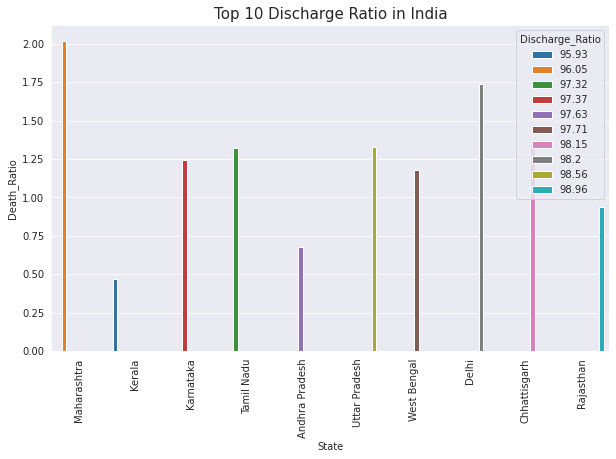

In [87]:
plt.figure(figsize=(10,6))
sns.barplot(x='State',y='Death_Ratio',data=df[:10],hue='Discharge_Ratio')
plt.xticks(rotation=90)
plt.title("Top 10 Discharge Ratio in India",fontsize=15)

Text(0.5, 1.0, ' Lineplot for Discharge Ratio')

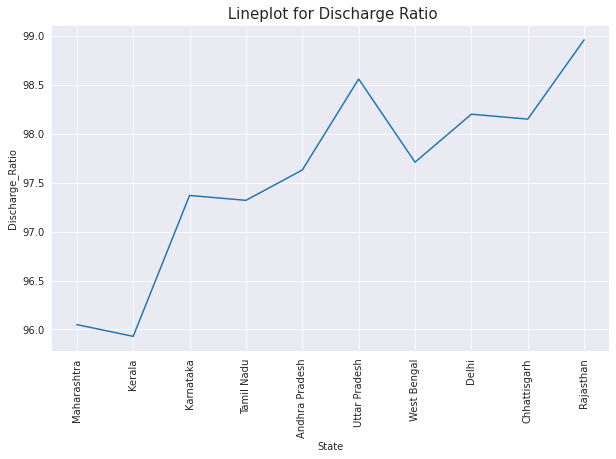

In [89]:
plt.figure(figsize=(10,6))
sns.lineplot(y='Discharge_Ratio',data=df[:10],x='State')
plt.xticks(rotation=90)
plt.title(" Lineplot for Discharge Ratio",fontsize=15)

**''' boxplot '''**

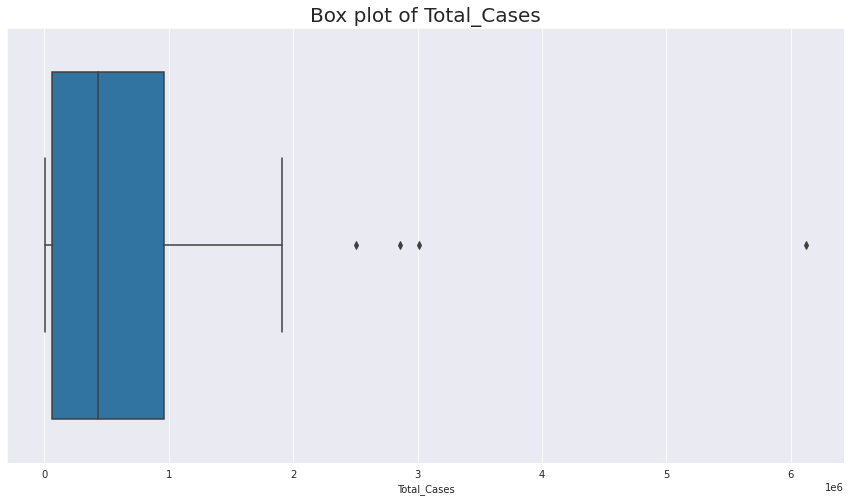

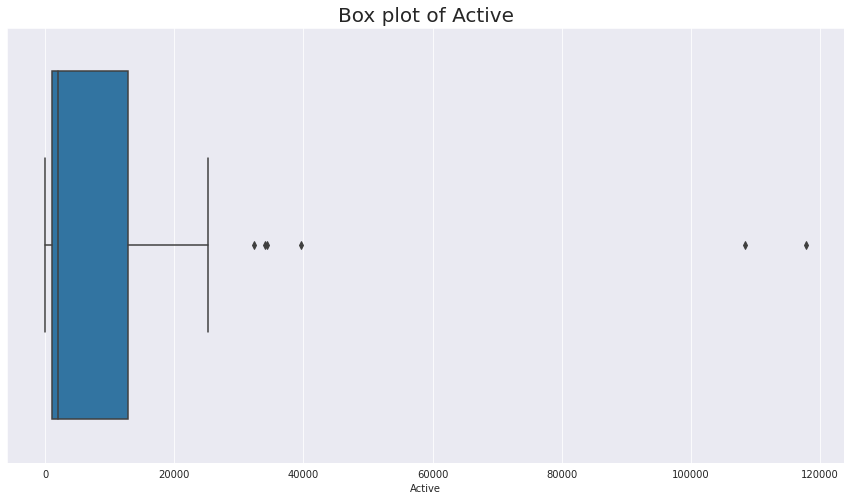

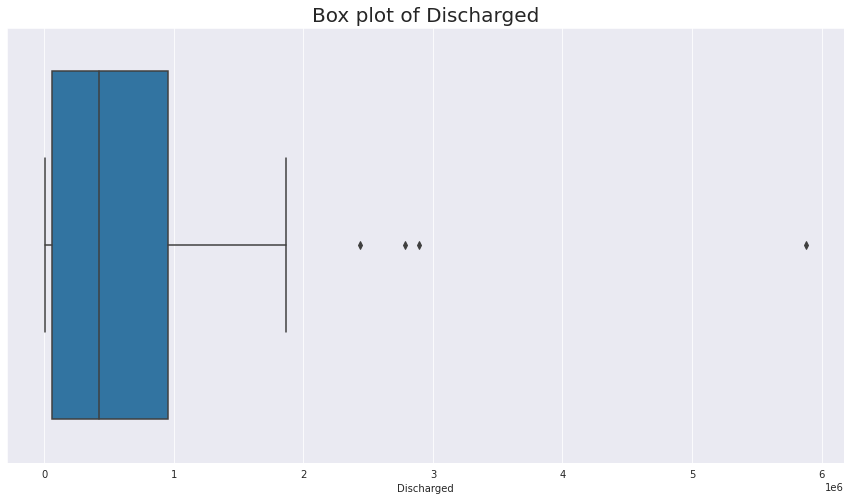

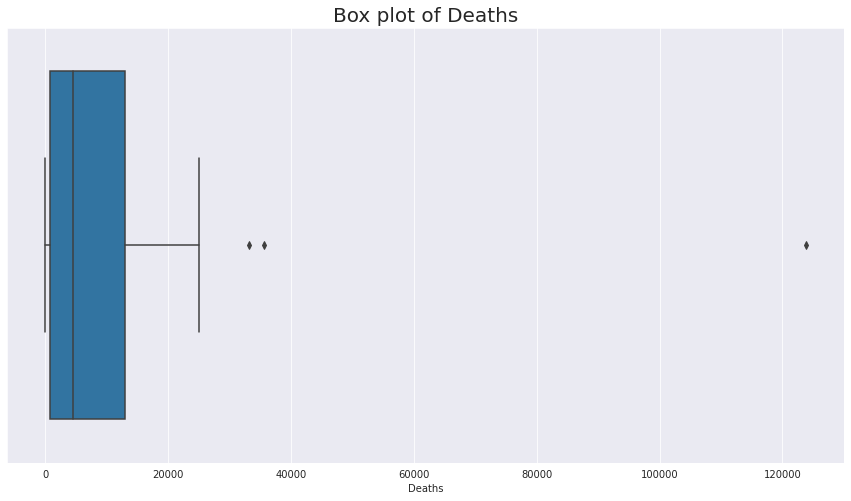

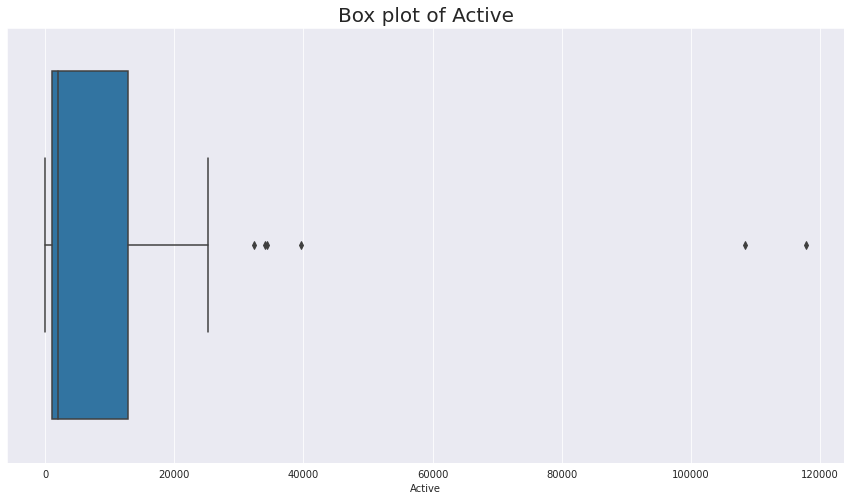

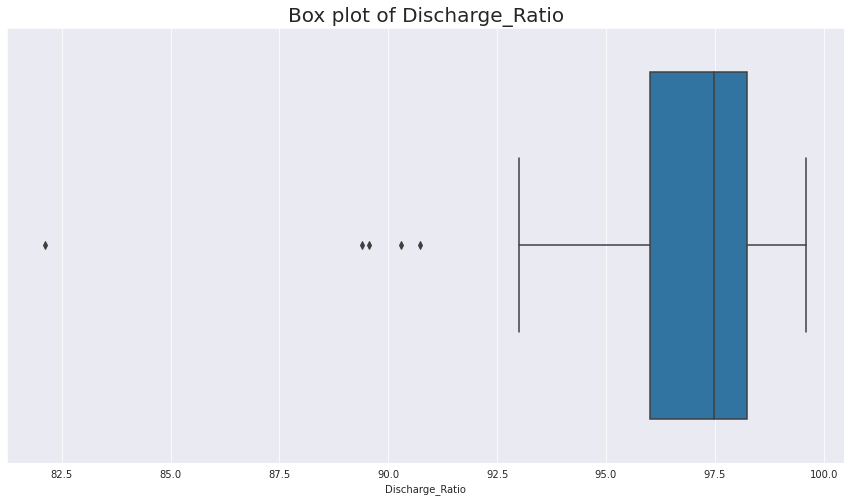

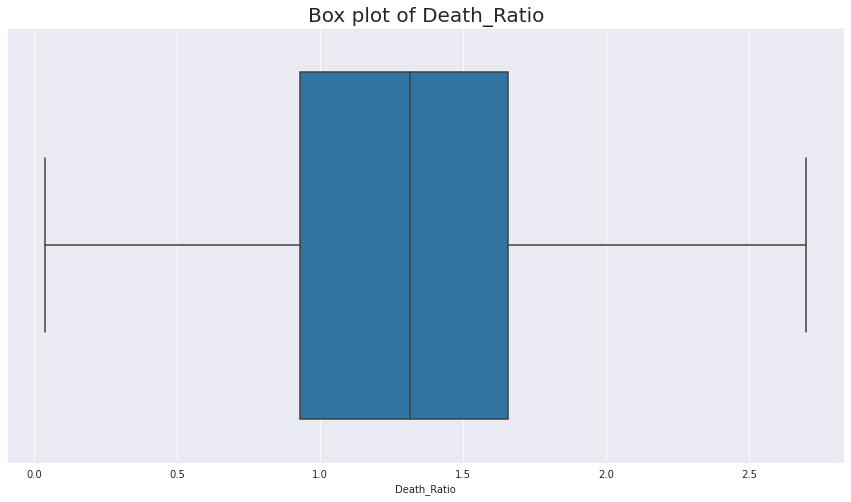

In [34]:
''' boxplot '''
for column in ['Total_Cases', 'Active', 'Discharged', 'Deaths', 'Active', 'Discharge_Ratio', 'Death_Ratio']:
    plt.figure(figsize=(15, 8))
    sns.boxplot(df[column])
    plt.title("Box plot of {}".format(column), fontsize=20);

**Adding new column called 'Recoverd cases ' by Domain Knowledge**

In [39]:

recovered_cases = df['Total_Cases'] - (df['Active'] + df['Deaths'])

''' adding it to df '''
df['Recovered_Cases'] = recovered_cases

In [40]:
df.head()

,State,Total_Cases,Active,Discharged,Deaths,Active_Ratio,Discharge_Ratio,Death_Ratio,Recovered_Cases
0,Maharashtra,6122893,117869,5881167,123857,1.93,96.05,2.02,5881167
1,Kerala,3011694,108400,2889186,14108,3.60,95.93,0.47,2889186
2,Karnataka,2862338,39626,2787111,35601,1.38,97.37,1.24,2787111
3,Tamil Nadu,2506848,34076,2439576,33196,1.36,97.32,1.32,2439576
4,Andhra Pradesh,1911231,32356,1865956,12919,1.69,97.63,0.68,1865956


**Total Recovered Cases in Each State**

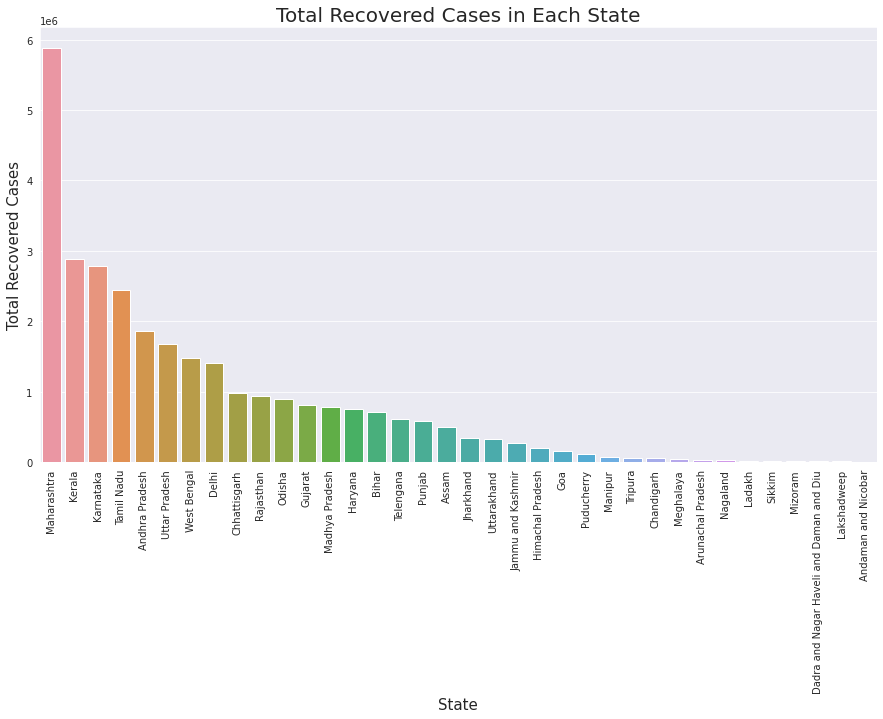

In [41]:
rec_cases = df.groupby('State')['Recovered_Cases'].sum().sort_values(ascending=False)

''' plotting recovered cases on barplot '''
plt.figure(figsize=(15, 8));
plt.xticks(rotation=90)
sns.barplot(rec_cases.index, rec_cases);
plt.title('Total Recovered Cases in Each State', fontsize=20);
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Recovered Cases', fontsize=15);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

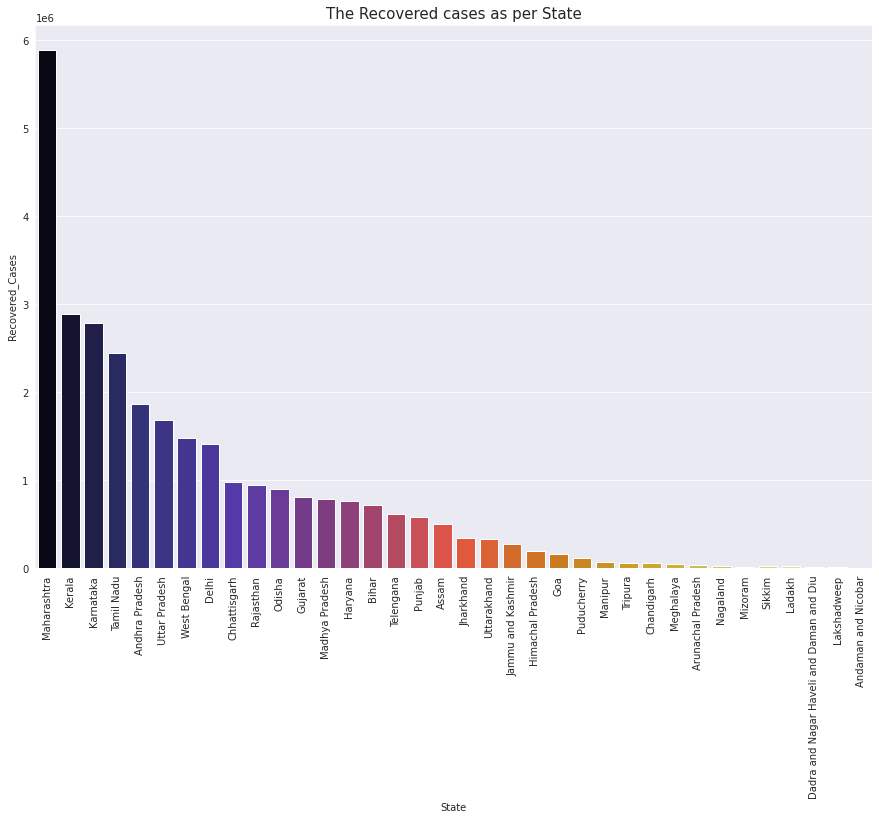

In [91]:
plt.figure(figsize=(15,10))
sns.barplot(x='State',y='Recovered_Cases',palette='CMRmap',data=df)
plt.title("The Recovered cases as per State",fontsize=15)
plt.xticks(rotation=90)

**''' looking at top 10 States Recovered cases '''**

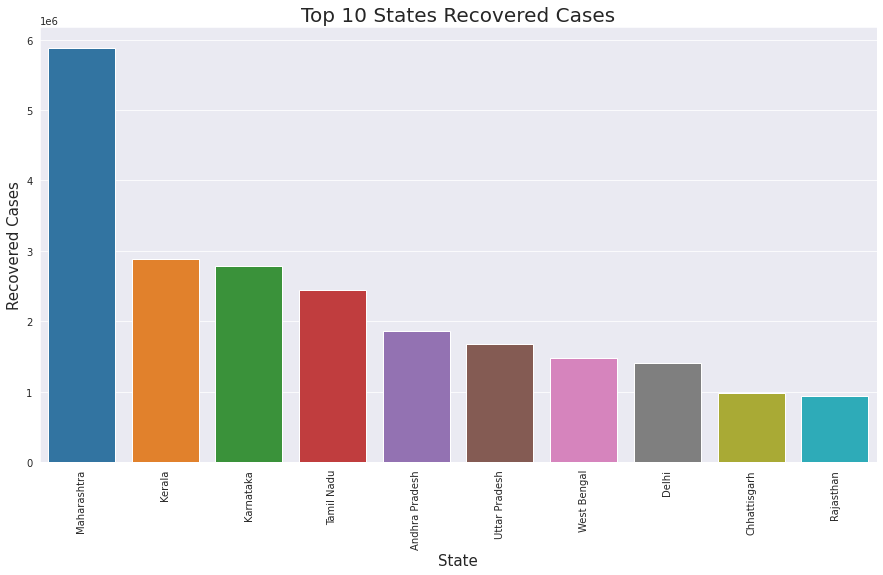

In [42]:
''' looking at top 10 States Recovered cases '''
rec_cases = rec_cases[:10]
plt.figure(figsize=(15, 8));
plt.xticks(rotation=90)
sns.barplot(rec_cases.index, rec_cases);
plt.title('Top 10 States Recovered Cases', fontsize=20);
plt.xlabel('State', fontsize=15)
plt.ylabel('Recovered Cases', fontsize=15);

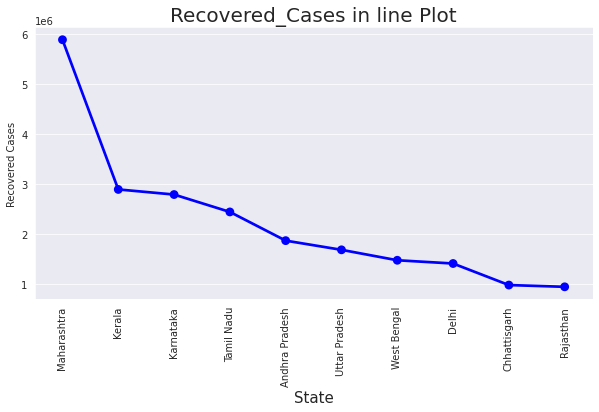

In [44]:
''' point plot of recovered cases '''
plt.figure(figsize=(10,5))
sns.pointplot(x='State',y='Recovered_Cases',data=df.head(10), color='blue')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize=15)
plt.ylabel('Recovered Cases')
plt.title("Recovered_Cases in line Plot",fontsize=20);

**"Recovery in Top 5 states in India"**

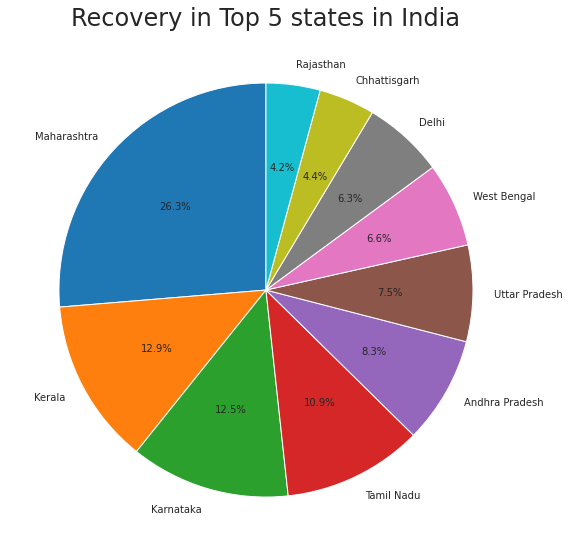

In [62]:
plt.figure(figsize=(8,8))
labels = df.index
plt.pie(x='Recovered_Cases',data=df[:10],labels='State',startangle=90,autopct='%.1f%%')
plt.title("Recovery in Top 5 states in India", fontsize = 24) 
plt.tight_layout() 
plt.show()

**''' Bivariate analysis between recovered_cases and Staes '''**

<Figure size 1800x864 with 0 Axes>

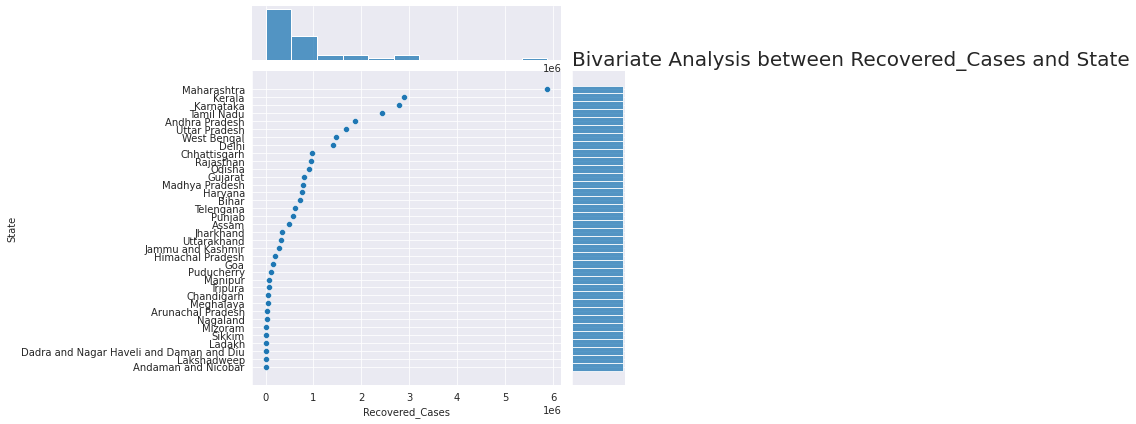

In [54]:
''' bivariate analysis between recovered_cases and Staes '''
plt.figure(figsize=(25, 12));
sns.jointplot(x='Recovered_Cases',y='State', data=df, kind='scatter');
plt.xticks(rottion=90);
plt.xlabel('Recovered Cases', fontsize=15);
plt.ylabel('State', fontsize=15);
plt.title('Bivariate Analysis between {} and {}'.format('Recovered_Cases', 'State'), fontsize=20, loc='left');

**''' Bivariate Analysis between Total Cases and State'''**

<Figure size 1080x576 with 0 Axes>

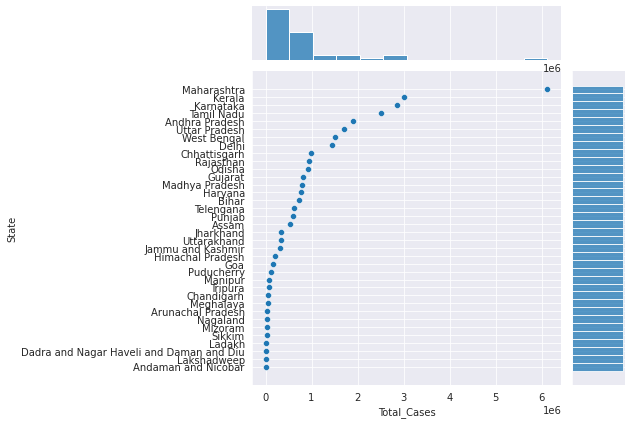

In [92]:
''' Bivariate Analysis between Total Cases and State'''
plt.figure(figsize=(15, 8));
sns.jointplot(x='Total_Cases',y='State', data=df,kind='scatter');
plt.xticks(rotation=90);
plt.xlabel('Total Cases', fontsize=15);
plt.ylabel('State', fontsize=15);

In [98]:
print(120*"=")

**Summary**

1. Maharashtra has been affected the most in India. 
2. Kerela stands the second followed by Karnataka
3. Rajashthan has the best discharge ratio 
4. Discharge to Active Ratio is highest in Kerela followed by Karnataka. 
5. Death ratio is highest in Maharashtra and Chattisgarh.
6. Most Active Ratio is in Kerela and least is in Delhi and Uttar Pradesh 
7. Recovery is also highest in Maharashtra....Kerala and Karnataka stands at 2nd, 3rd respective.

In [99]:
print(120*"=")